# Decision Tree Classification

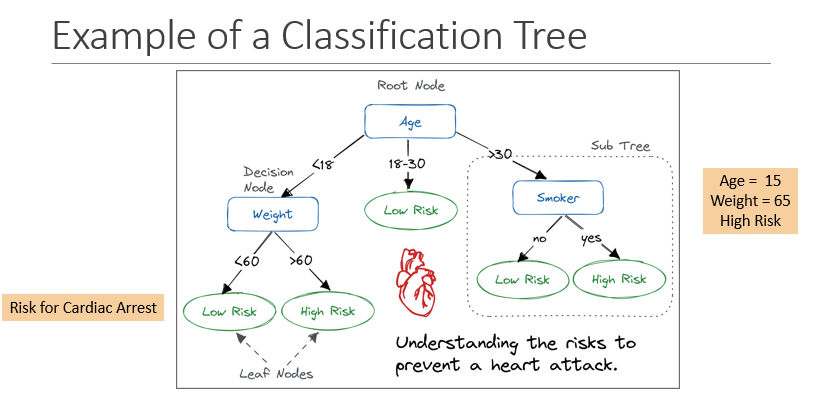

In [52]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1 :- Read The dataset

In [53]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 2 :- Perform basic data quality checks

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [55]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(1)

## Step 3 :- Seperate X and Y(species)

In [57]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [58]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [60]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Step 4 :- Perform preprocessing on X

In [61]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [63]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [64]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [65]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

## Step 5 :- Train Test Split
test_size = 0.33, random_state=42

In [66]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.33, random_state=42
)

In [67]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [68]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [69]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [70]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


## Step 6 :- Model Building

In [71]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="gini"
)
model1.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [72]:
model1.score(xtrain, ytrain)

0.66

In [73]:
model1.score(xtest, ytest)

0.68

# Tuning the model

In [74]:
params = {
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_split": [4, 5, 6, 7, 8],
    "min_samples_leaf": [4, 5, 6, 7, 8],
    "criterion": ["gini", "entropy"]
}

In [75]:
params

{'max_depth': [1, 2, 3, 4, 5],
 'min_samples_split': [4, 5, 6, 7, 8],
 'min_samples_leaf': [4, 5, 6, 7, 8],
 'criterion': ['gini', 'entropy']}

In [76]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring="f1_macro")
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [4, 5, 6, 7, 8],
                         'min_samples_split': [4, 5, 6, 7, 8]},
             scoring='f1_macro')

In [77]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [78]:
gscv.best_score_

np.float64(0.9223826173826174)

In [79]:
best_dtc = gscv.best_estimator_

In [80]:
best_dtc

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=4)

## Step 7 :- Evaluate the model

In [81]:
best_dtc.score(xtrain, ytrain)

0.96

In [82]:
best_dtc.score(xtest, ytest)

1.0

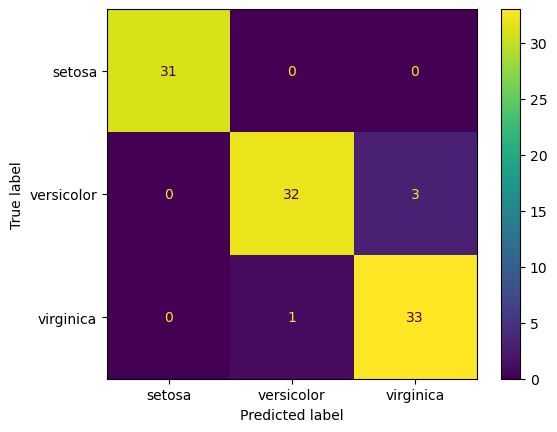

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_dtc, xtrain, ytrain)

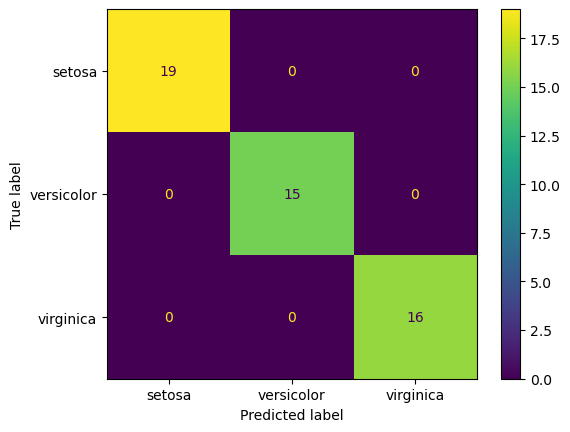

In [84]:
ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)

In [85]:
ypred_test = best_dtc.predict(xtest)

In [86]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [87]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### This is a good model because f1_score > 0.8 for both train and test

In [90]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

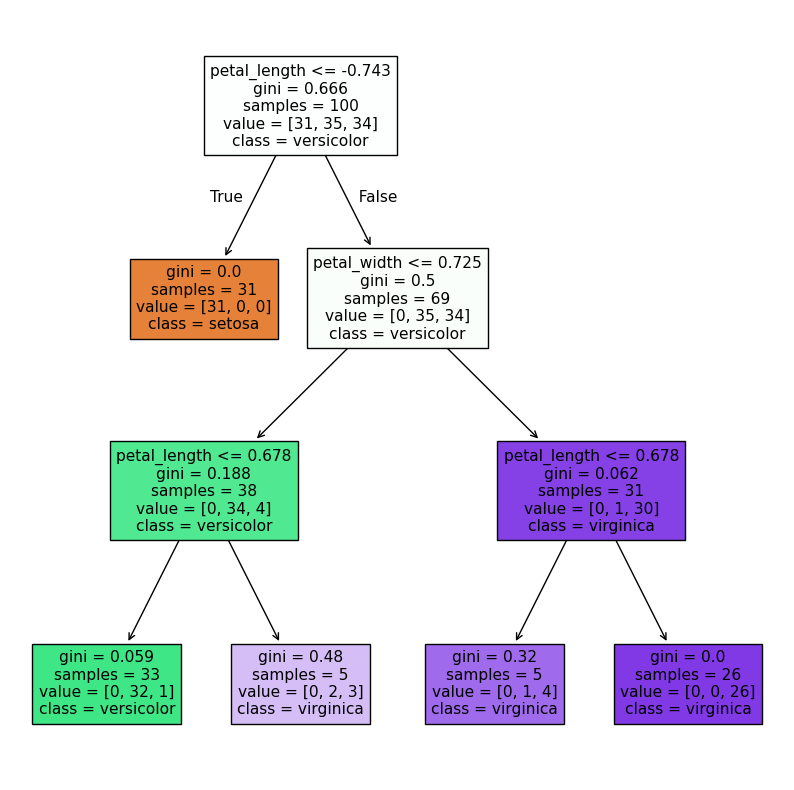

In [91]:
plt.figure(figsize=(10, 10))
plot_tree(
    best_dtc, 
    feature_names=xtrain.columns, 
    class_names= best_dtc.classes_,
    filled=True
)
plt.show()

## Step 8 - Perform out of sample predictions

In [92]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [93]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [94]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [95]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [96]:
preds = best_dtc.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [97]:
probs = best_dtc.predict_proba(xnew_pre)

In [98]:
probs

array([[0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.4       , 0.6       ]])

In [99]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [100]:
xnew["species_pred"] = preds
xnew[best_dtc.classes_] = probs

In [101]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0,0.969697,0.030303
1,6.9,3.1,5.1,2.3,virginica,0.0,0.000000,1.000000
2,5.1,2.5,3.0,1.1,versicolor,0.0,0.969697,0.030303
3,4.4,2.9,NaN,0.2,versicolor,0.0,0.969697,0.030303
4,5.9,3.0,5.1,1.8,virginica,0.0,0.000000,1.000000
5,5.5,3.5,1.3,0.2,setosa,1.0,0.000000,0.000000
6,5.6,NaN,3.6,1.3,versicolor,0.0,0.969697,0.030303
7,6.5,3.0,5.2,2.0,virginica,0.0,0.000000,1.000000
8,5.3,3.7,1.5,0.2,setosa,1.0,0.000000,0.000000
9,5.1,3.4,1.5,NaN,setosa,1.0,0.000000,0.000000


In [102]:
xnew.to_csv("Results.csv", index=False)